## 생성 RNN의 간단한 역사

2014년 후반머신 러닝 공동체에서도 솟의 사람들만이 LSTM이란 용어를 알았습니다. 순환 네트워크를 사용하여 시퀸스 데이터를 성공적으로 생성한 애플리케이션은 2016년이 되어서야 주류가 되기 시작했습니다. 하지만 이 기술은 LSTM 알고리즘이 개발된 이래 역사가 꽤 오래되었습니다. 이 알고리즘은 초기에 글자를 하나씩 생성하는 데 사용되었습니다.

2002년 더글라스 에크는 스위스의 슈미드 후버의 연구실에서 LSTM을 음악 생성에 처음 적용하여 가능성 있는 결과를 얻었습니다. 에크는 현재 구글 브레인의 연구원으로, 2016년에는 마젠타란 새로운 연구 그룹을 시작했습니다. 여기에는 최신 딥러닝 기술을 사용하여 멋진 음악을 만드는 것에 집중하고 있습니다. 때로는 좋 아이디어가 실현되는데 15년이 걸리기도 합니다.

2000년대 후반과 2010년대 초반에 알렉스 그레이브스는 순환 네트워크를 사용하여 시퀸스 데이터를 생성하는 데 아주 중요한 선구적인 일을 했습니다. 특히 2013년에 팬 위치를기록한 시계열 데이터를 사용하여 순환 네트워크와완전 연결 네트워크를 혼합한 네트워크로 사람이 쓴 것 같은 손글씨를 생성했으며, 이 작업이 전환점이 되었습니다. 때맞추어 등장한 특별한 이 신경망 애플리케이션은 꿈을 꾸는 컴퓨터를 상상하게 만들었고, 필자가 케라스를 개발할 때 많은 영감을 주었습니다. 그레이브스는 논문 사전 출판 서버인 아카이브에 업로드한 2013년 레이텍 파일에 비슷한 주석을 남겼습니다. "시퀸스 데이터를생성하는 것은 컴퓨터가 꿈을 꾸게 하는 것입니다." 몇 년이 지난 지금 우리는 이런 애플리케이션을 당연하게 받아들입니다. 그 당시에는 그레이브스의 실험을 보고 가능성만으로 대단한 것이라고 생각하기는 어려웠습니다.

그 이후 순환 신경망은 음악 생성, 대화 생성, 이미지 생성, 음성 합성, 분자 설계에 성공적으로 사용되었습니다. 심지어 실제 배우가 캐스팅된 영화의 대본을 만드는 데도 사용되었습니다.

## 시퀸스 데이터를 어떻게 생성할까?

딥러닝에서 시퀸스 데이터를 생성하는 일반적인 방법은 이전 토큰을 입력으로 사용해서 시퀸스의 다음 1개 또는 몇 개의 토큰을 예측하는 것입니다. 예를 들어 "the cat is on ma"란 입력이 주어지면 다음 글자인 타깃 "t"를 예측하도록 네트워크를 훈련합니다. 텍스트 데이터를 다룰 때 토큰은 보통 단어 또는 글자입니다. 이전 토큰들이 주어졌을 때 다음 토큰의 확률을 모델링 할 수 있는 네트워크를 언어 모델이라고 부릅니다. 언어 모델은 언어의 통계적 구조인 잠재 공간을 탐색합니다.

언어 모델을 훈련하고 나면 이 모델에서 샘플링을 할 수 있습니다(새로운 시퀸스를 생성합니다). 초기 텍스트 문자열을 주입하고(조건데이터라고 부릅니다)새로운 글자나 단어를 생성합니다(한 번에 여러 번 반복합니다(밑에 그림 참고). 이런 반복을 통해 모델이 훈련한 데이터 구조가 반영된 임의의 길이를 가진 시퀸스를 생성할 수 있습니다. 사람이 쓴 문장과 거의 비슷한 시퀸스를 만듭니다. 이 절의 예제는 LSTM 층을 사용합니다. 텍스트 말뭉치에서 N개의 글자로 이루어진 문자열을 추출하여 주입하고 N+1번째 글자를 예측하도록 훈련합니다. 모델의 출력은 출력 가능한 모든 글자에 해당하는 소프트맥스 값입니다. 즉 다음 글자의 확률 분포입니다. 이 LSTM을 글자 수준의 신경망 언어 모델이라고 부릅니다.

언어 모델을 사용하여 한 글자씩 텍스트를 생성하는 과정

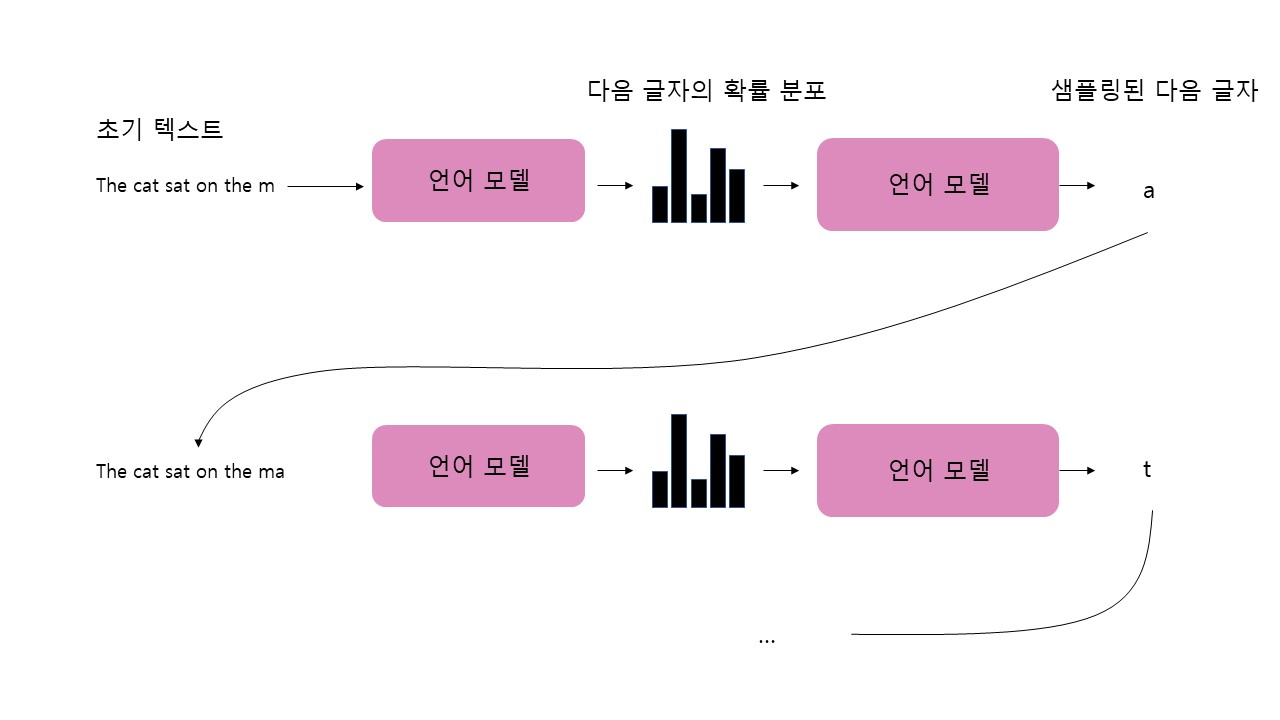

텍스트를 생성할 때 다음 글자를 선택하는 방법이 아주 중요합니다. 단순한 방법은 항상 가장 높은 활률을 가진 글자를 선택하는 탐욕적 샘플링입니다. 이 방법은 반복적이고 예상 가능한 문자열을 만들기 때문에 논리적인 언어처럼 보이지 않습니다. 좀 더 흥미로운 방법을 사용하면 놀라운 선택이 만들어집니다. 다음 글자의 확률 분포에서 샘플링하는 과정에 무작위성을 주입하는 방법입니다. 이를 확률적 샘플링이라고 부릅니다 이런 방식을 사용할 경우 'e'가 다음 글자가 될 확률이 0.3이라면, 모델이 30%정도는 이 글자를 선택합니다. 탐욕적 샘플링을 확률적 샘플링르로 설명할 수도 있습니다. 한 글자의 확률이 1이고 나머지 글자는 모두 0인 확률 분포를 가지는 경우입니다.

모델의 소프트맥스 출력은 확률적 샘플링에 사용하기 좋습니다. 이따금 샘플링될 것 같지 않은 글자를 샘플링합니다. 훈련 데이터에는 없지만 실제 같은 새로운 단어를 만들어 재미있고 창의적으로 보이는 문장을 생성합니다. 이 전략에는 한 가지 문제가 있습니다. 샘플링 과정에서 무작위성의 양을 조절할 방법이 없습니다

왜 무작위성이 크거나 작아야 할까요? 극단적인 경우를 생각해 보죠. 균등 확률 분포에서 다음 글자를 추출하는 완전한 무작위 샘플링이 있습니다. 모든 글자의 확률은 같습니다. 이 구조는 무작위성이 최대입니다. 다른 말로 하면 이 확률 분포는 최대의 엔트로피를 가집니다. 당연하게 흥미로운 것들을 생산하지 못합니다. 반대의 경우 탐욕적 샘플링은 무작위성이 없기 때문에 흥미로운 것을 전혀 만들지 못합니다. 탐욕적 샘플링의 확률 분포는 최소의 엔트로피를 가집니다. 모델의 소프트맥스 출력인 '실제'확률 분포에서 샘플링하는 것은 이 두 극단의 중간에 위치해 있습니다. 중간 지점에서는 시도해 볼 만한 더 높거나 낮은 엔트로피가 많습니다. 작은 엔트로피는 예상 가능한 구조를 가진 시퀸스를 생성합니다(더 실제처럼 보입니다). 반면에 높은 엔트로피는 놀랍고 창의적인 시퀸스를 만듭니다. 생성 모델에서 샘플링을 할 때 생성 과정에 무작위성의 양을 바꾸어 시도해 보는 것이 좋습니다. 흥미는 매우 주관적이므로 최적의 엔트로피 값을 미리 알 수 없기 때문입니다. 얼마나 흥미로운 데이터를 생성할 것인지는 결국 사람이 판단해야 합니다.

샘플링 과정에서 확률의 양을 정하기 위해 소프트맥스 온도라는 파라미터를 사용합니다. 이 파라미터는 샘플링에 사용되는 확률 분포의 엔트로피를 나타냅니다. 얼마나 놀라운 또는 예상되는 글자를 선택할지 결정합니다. temperature값이 주어지면 다음과 같이 가중치를 적용하여 원본 확률 분포에서 새로운 확률 분포를 계산합니다.



In [1]:
import numpy as np

def reweight_distribution(original_distribution, temperature = 0.5):   #original_distribution은 전체 합이 1인 1D넘파이 배열입니다. temperature는 출력 분포의 엔트로피 양을 결정합니다.
  distribution = np.log(original_distribution) / temperature
  distribution = np.exp(distribution)
  return distribution / np.sum(distribution)

높은 온도는 엔트로피가 높은 샘플링 분포를 만들어 더 놀랍고 생소한 데이터를 생성합니다. 반면에 낮은 온도는 무작위성이 낮기 때문에 예상할 수 있는 데이터를 생산합니다.

##글자 수준의 LSTM 텍스트 생성 모델 구현
이런 아이디어를 케라스로 구현해 보죠. 먼저 언어 모델을 학습하기 위해 많은 텍스트 데이터가 필요합니다. 위키피디아나 반지의 제왕처럼 아주 큰 텍스트 파일이나 텍스트 파일의 묶음을 사용할 수 있습니다. 이 예에서는 19세기 후반 독일의 철학자 니체의 글을 사용하겠습니다(영어로 번역된 글입니다). 학습할 언어 모델은 일반적인 영어 모델이 아니라 니체의 문체와 특정 주제를 따르는 모델일 것입니다.

### 데이터 전처리
먼저 말뭉치를 내려받아 소문자로 바꿉니다.

In [2]:
import keras
import numpy as np
import tensorflow

path = tensorflow.keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('말뭉치 크기:', len(text))

606208/600901 [==============================] - 0s 0us/step
말뭉치 크기: 600893


In [3]:
type(text)

str

그다음 maxlen 길이를 가진 시퀸스를 중복하여 추출합니다. 추출된 시퀸스를 원-핫 인코딩으로 변환하고 크기가 (sequences, maxlen, unique_characters)인 3D 넘파이 배열 x로 합칩니다. 동시에 훈련 샘플에 상응하는 타깃을 담은 배열 y를 준비합니다. 타깃은 추출된 시퀸스 다음에 오는 원-핫 인코딩된 글자입니다.

In [4]:
#60개의 글자로 된 시퀸스를 추출합니다.
maxlen = 60
#세글자씩 건너뛰면서 새로운 시퀸스를 샘플링 합니다.
step = 3

#추출한 시퀸스를 담을 리스트
sentences = []

#타깃(시퀸스 다음 글자)를 담을 리스트
next_chars = []

for i in range(0, len(text) - maxlen, step):
  sentences.append(text[i:i+maxlen])
  next_chars.append(text[i+maxlen])
print('시퀀스 개수:', len(sentences))

#말뭉치에서 고유한 글자를 담은 리스트
chars = sorted(list(set(text)))
print('고유한 글자:', len(chars))
#chars 리스트에 있는 글자와 글자의 인덱스를 매핑한 딕셔너리
char_indices = dict((char, chars.index(char)) for char in chars)

print('벡터화...')
# 글자를 원-핫 인코딩하여 0과 1의 이진 배열로 바꿉니다.
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

시퀀스 개수: 200278
고유한 글자: 57
벡터화...


##네트워크 구성

이 네트워크는 하나의 LSTM층과 그 뒤에 Dense 분류기가 뒤따릅니다. 분류기는 가능한 모든 글자에 대한 소프트맥스 출력을 만듭니다. 순환 신경망이 시퀸스 데이터를 생성하는 유일한 방법은 아닙니다. 최근에는 1D 컨브넷도 이런 작업에 아주 잘 들어맞는다는 것이 밝혀졌습니다.

In [5]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape = (maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation = 'softmax'))

타깃을 원-핫 인코딩되어 있기 때문에 모델을 훈련하기 위해 categorical_crossentropy 손실을 사용합니다.

In [6]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer)

##언어 모델 훈련과 샘플링
훈련된 모델과 시드로 쓰일 간단한 텍스트가 주어지면 다음과 같이 반복하여 새로운 텍스트를 생성할 수 있습니다.

 1. 지금까지 생성된 텍스트를 주입하여 모델에서 다음 글자에 대한 확률 분포를 뽑습니다.
 2. 특정 온도로 이 확률 분포의 가중치를 조정합니다.
 3. 가중치가 조정된 분포에서 무작위로 새로운 글자를 샘플링합니다.
 4. 새로운 글자를 생성된 텍스트의 끝에 추가합니다.

다음 코드는 모델에서 나온 원본 확률 분포의 가중치를 조정하고 새로운 글자의 인덱스를 추출합니다(샘플링 함수입니다).

In [7]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

마지막으로 다음 반복문은 반복적으로 훈련하고 텍스트를 생성합니다. 에포크마다 학습이 끝난 후 여러가지 온도를 사용해 텍스트를 생성합니다. 이렇게 하면 모델이 수렴하면서 생성된 텍스트가 어떻게 진화하는지 볼 수 있습니다. 온도가 샘플링 전략에 미치는 영향도 보여 줍니다.

In [9]:
import random
import sys

random.seed(42)
start_index = random.randint(0, len(text) - maxlen - 1)

# 60 에포크 동안 모델을 훈련합니다
for epoch in range(1, 60):
    print('에포크', epoch)
    # 데이터에서 한 번만 반복해서 모델을 학습합니다
    model.fit(x, y, batch_size=128, epochs=1)

    # 무작위로 시드 텍스트를 선택합니다
    seed_text = text[start_index: start_index + maxlen]
    print('--- 시드 텍스트: "' + seed_text + '"')

    # 여러가지 샘플링 온도를 시도합니다
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('------ 온도:', temperature)
        generated_text = seed_text
        sys.stdout.write(generated_text)

        # 시드 텍스트에서 시작해서 400개의 글자를 생성합니다
        for i in range(400):
            # 지금까지 생성된 글자를 원-핫 인코딩으로 바꿉니다
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            # 다음 글자를 샘플링합니다
            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)           
            sys.stdout.flush()
        print()

에포크 1
1565/1565 [==============================] - 294s 176ms/step - loss: 2.2766
--- 시드 텍스트: "the slowly ascending ranks and classes, in which,
through fo"
------ 온도: 0.2
the slowly ascending ranks and classes, in which,
through for the presence of the deen to the deselves and the selfering the sense of the pain of the starly the conscience for the preare and the still the sense of the preasence of his man and the still the man and the mode of the preasence of himself in the most contrates and the most deselves of the distrest in the person in the most man in the moral all the still the sense of the sense of the man and the
------ 온도: 0.5
the slowly ascending ranks and classes, in which,
through for this all the conscience, they here thet the will the selference, the are divelly self--will the preaen at in the confery the still desenvers in in the terman perhaps of the deen the soul himself of himself perhaps it in the latter which the man it he were the still the still will as on sen

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


more magic.


12 himver kind of from bind of incapage-clument
and "kancu of mor
에포크 19
1565/1565 [==============================] - 281s 180ms/step - loss: 1.3227
--- 시드 텍스트: "the slowly ascending ranks and classes, in which,
through fo"
------ 온도: 0.2
the slowly ascending ranks and classes, in which,
through former and the same thinker of the subject and souls. the sense of the same the superation of the superation of the superstand of the same thing that which the schoilty of the same thinkers of the superations of the superstility of the same and the same a strength of the superation of the souls of the sense of the superation of the man of the superation of the superstipusity of the souls of the stat
------ 온도: 0.5
the slowly ascending ranks and classes, in which,
through fore a still as the exceptional of the states of determined and all short cantest itself a new the souls of the desire and souls. the future of the repudiation, and can still under a species of the hasty
of the re


여기서 볼 수 있듯이 낮은 온도는 아주 반복적이고 예상되는 텍스트를 만듭니다. 하지만 국부적인 구조는 매우 실제와 같습니다. 특히 모든 단어(단어는 글자의 지역 패턴으로 이루어집니다)가 실제 영어 단어입니다. 높은 온도에서 생성된 텍스트는 아주 흥미롭고 놀라우며 창의적이기도 합니다. 이따금 꽤 그럴싸하게 보이는 완전히 새로운 단어를 창조합니다(‘begarmed’와 ‘isharent’ 같은 단어입니다). 높은 온도에서는 국부적인 구조가 무너지기 시작합니다. 대부분의 단어가 어느정도 무작위한 문자열로 보입니다. 확실히 이 네트워크에서는 텍스트 생성에 가장 좋은 온도는 0.5입니다. 항상 다양한 샘플링 전략으로 실험해 봐야합니다! 학습된 구조와 무작위성 사이에 균형을 잘 맞추면 흥미로운 것을 만들 수 있습니다.

더 많은 데이터에서 크고 깊은 모델을 훈련하면 이것보다 훨씬 논리적이고 실제와 같은 텍스트 샘플을 생성할 수 있습니다. 당연히 우연이 아닌 의미 있는 텍스트가 생성된다고 기대하지 마세요. 글자를 연속해서 나열하기 위한 통계 모델에서 데이터를 샘플링한 것뿐입니다. 언어는 의사소통의 수단입니다. 의사소통이 의미하는 것과 의사소통이 인코딩된 메시지의 통계 구조 사이는 차이가 있습니다. 이 차이를 검증하기 위해 다음과 같은 사고 실험을 해보죠. 컴퓨터가 대부분의 디지털 통신에서 하는 것처럼 사람의 언어가 의사소통을 압축하는데 더 뛰어나다면 어떨까요? 언어의 의미가 줄진 않지만 고유한 통계 구조가 사라질 것입니다. 이는 방금과 같은 언어 모델을 학습하는 것을 불가능하게 만듭니다.

##정리
이전의 토큰이 주어지면 다음 토큰(들)을 예측하는 모델을 훈련하여 시퀀스 데이터를 생성할 수 있습니다.
텍스트의 경우 이런 모델을 언어 모델이라 부릅니다. 단어 또는 글자 단위 모두 가능합니다.
다음 토큰을 샘플링할 때 모델이 만든 출력에 집중하는 것과 무작위성을 주입하는 것 사이에 균형을 맞추어야 합니다.
이를 위해 소프트맥스 온도 개념을 사용합니다. 항상 다양한 온도를 실험해서 적절한 값을 찾습니다.